In [1]:
import vtkplotlib as vpl
import numpy as np
from stl import mesh
from stl.mesh import Mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
# Define the 8 vertices of the cube
Lx = 25
Ly = 25
Lz = 50
# vertices = np.array([\
#     [-1, -1, -1],
#     [+1, -1, -1],
#     [+1, +1, -1],
#     [-1, +1, -1],
#     [-1, -1, +1],
#     [+1, -1, +1],
#     [+1, +1, +1],
#     [-1, +1, +1]])
vertices = np.array([\
    [-Lx, -Ly, -Lz],
    [+Lx, -Ly, -Lz],
    [+Lx, +Ly, -Lz],
    [-Lx, +Ly, -Lz],
    [-Lx, -Ly, +Lz],
    [+Lx, -Ly, +Lz],
    [+Lx, +Ly, +Lz],
    [-Lx, +Ly, +Lz]])
# Define the 12 triangles composing the cube
faces = np.array([\
    [0,3,1],
    [1,3,2],
    [0,4,7],
    [0,7,3],
    [4,5,6],
    [4,6,7],
    [5,1,2],
    [5,2,6],
    [2,3,6],
    [3,7,6],
    [0,1,5],
    [0,5,4]])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cube.vectors[i][j] = vertices[f[j],:]

# Write the mesh to file "cube.stl"
filename = 'cube.stl'
cube.save(filename)

<IPython.core.display.Javascript object>


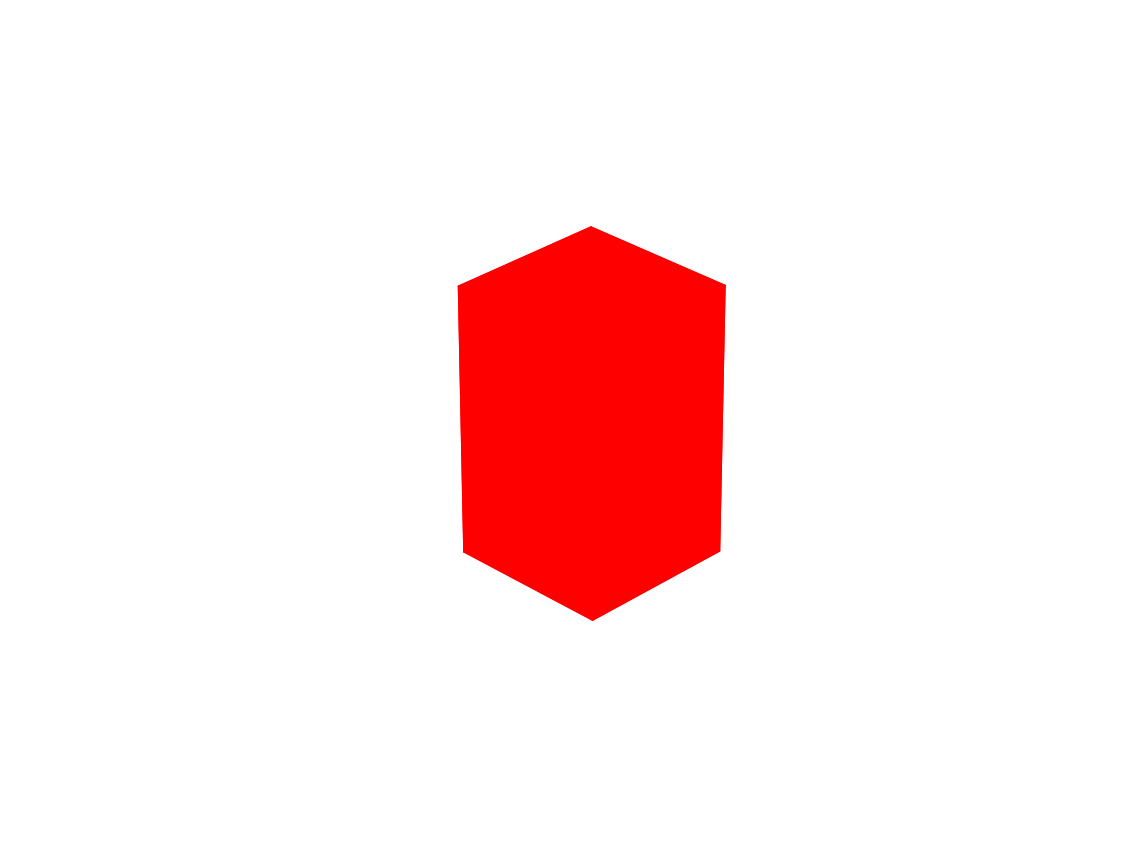

/var/folders/d4/79k8920n66j07rbcltjlhjx00000gr/T/ipykernel_41132/3167194282.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = figure.gca(projection='3d')


(-55.0, 55.0, -55.0, 55.0)

In [7]:
# Create a new plot
figure = plt.figure()
axes = figure.gca(projection='3d')

# Load the STL files and add the vectors to the plot
mymesh = mesh.Mesh.from_file(filename)

axes.add_collection3d(mplot3d.art3d.Poly3DCollection(mymesh.vectors, color='red'))
# axes.plot_surface(mymesh.x,mymesh.y,mymesh.z)

# Auto scale to the mesh size
scale = mymesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

#turn off grid and axis from display      
plt.axis('off')

#set viewing angle
# axes.view_init(azim=120)

# Show the plot to the screen
# plt.show()

In [5]:

# # Read the STL using numpy-stl
# mymesh = Mesh.from_file(filename)

# # Plot the mesh
# vpl.mesh_plot(mymesh)

# # Show the figure
# vpl.show()